https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

### This EDA aims to understand data metrics and define the project scope. It involves analyzing five tables, totaling 3 million rows and 21 columns, to predict 15 days' sales for 33 categories across 54 stores in Ecuador. The goal is to help stores optimize their inventory, thereby preventing overstocking and understocking.

### Data Dictionary

#### 1. train.csv

- **store_nbr**: the store at which the products are sold.
- **family**: the type of product sold.
- **sales**: the total sales for a product family at a particular store on a given date. Fractional values are possible since products can be sold in fractional units (e.g., 1.5 kg of cheese, as opposed to 1 bag of chips).
- **onpromotion**: the total number of items in a product family that were being promoted at a store on a given date.

#### 2. stores.csv

include **city, state, type, and cluster**.
- **cluster**: a grouping of similar stores.

#### 3. oil.csv

**Daily oil price**. (Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

#### 4. holidays_events.csv

Holidays and Events, with metadata
A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. A transferred day is more like a normal day than a holiday. 
Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

#### 5.Additional Notes

Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales for several weeks after the earthquake.quake.).)s.date.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Check the main table (train.csv)

In [55]:
# Check train.csv for general information
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [58]:
# check for duplicated rows
df.duplicated().sum()

0

In [3]:
# check for null values
df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [4]:
df.shape

(3000888, 6)

In [5]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
df["store_nbr"].nunique()

54

In [7]:
# Check for product families
df["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [11]:
# Check for the number of product families
df["family"].nunique()

33

### In the train.csv, there are no null values. The data has 3,000,888 rows and 6 columns. The target column is "sales". The data contains 33 product categories, from automotive and baby care to groceries.

### Checking for trends

In [17]:
# Add "year" column for future plotting
df["date"] = pd.to_datetime(df["date"])  # Ensure the date column is in datetime format
df["year"] = df["date"].dt.year

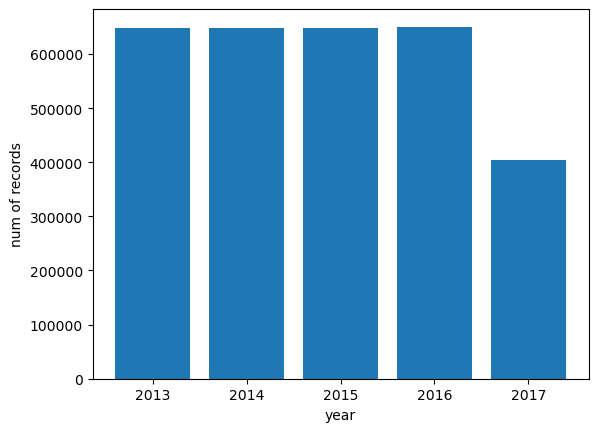

In [21]:
# plot based on years
year_counts=df.groupby("year")["id"].count()
plt.figure()
plt.bar(year_counts.index,height=year_counts.values)
plt.xlabel("year")
plt.ylabel("num of records")
plt.show()

### Trend: The data include daily sales from 2013 to 2017.
### Q1:
#### <span style="color: red;">Based on the above data, should I randomly select the testing set or can I control the testing set(the last 15 days?)</span> 

In [74]:
df_family = df.groupby(["family"])["sales"].sum().sort_values()

In [76]:
df_family.index[-10:][::-1]

Index(['GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING', 'DAIRY',
       'BREAD/BAKERY', 'POULTRY', 'MEATS', 'PERSONAL CARE', 'DELI'],
      dtype='object', name='family')

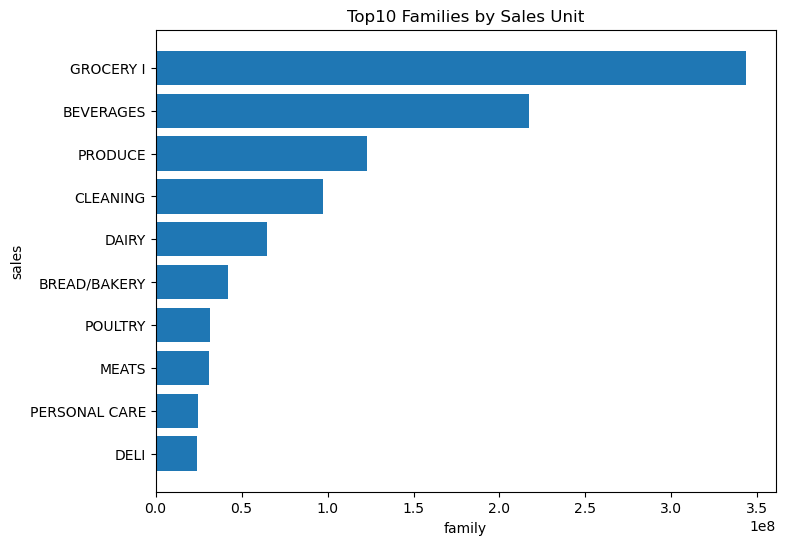

In [52]:
# plot the sales by product family
plt.figure(figsize=(8,6))
plt.barh(df_family.index[-10:],df_family.values[-10:])
plt.xlabel("family")
plt.ylabel("sales")
plt.title("Top10 Families by Sales Unit")
plt.show()

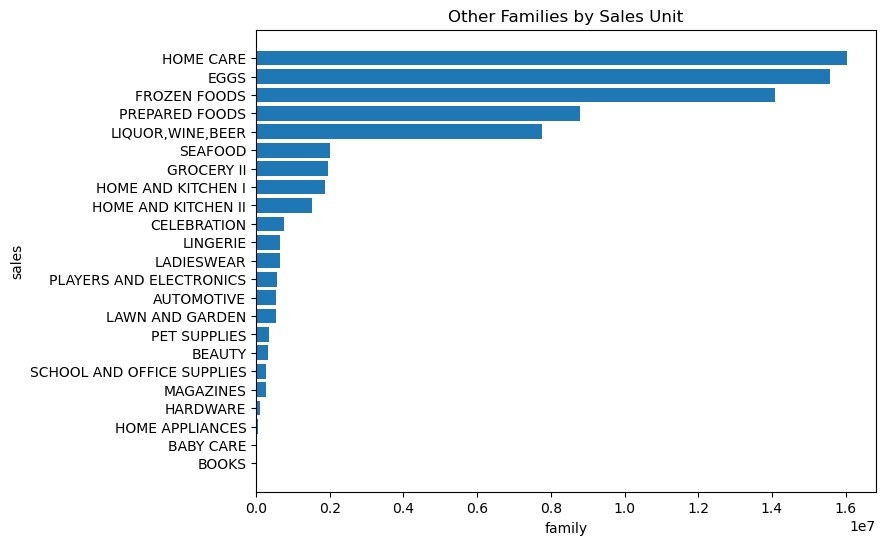

In [53]:
# plot the sales by product family
plt.figure(figsize=(8,6))
plt.barh(df_family.index[:-10],df_family.values[:-10])
plt.xlabel("family")
plt.ylabel("sales")
plt.title("Other Families by Sales Unit")
plt.show()

### Trend: The data include 33 families but from "seafood", sales are very low.
### Q1:
#### <span style="color: red;">Should I take out families from "seafood" and below?</span> 

In [59]:
df2 = pd.read_csv("stores.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [60]:
# check for duplicated rows
df2.duplicated().sum()

0

In [62]:
df2.shape

(54, 5)

In [63]:
df2.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [64]:
df2.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

### There are no null values or duplicates. There are 54 stores all together. Use 'store_nbr' to join stores.csv with train.csv. My question: Are text columns required to be converted to numeric values to do modelling?

#### Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.

In [65]:
df3 = pd.read_csv("oil.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [66]:
df3.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [69]:
df3.duplicated().sum()

0

### There are 43 null values in the oil table. Since oil price is a crucial indicator for sales, and it is not a lot, I can search for the oil price and fill the nulls. Oil table can be joined with the above tables using 'date'.

In [70]:
df4 = pd.read_csv("holidays_events.csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [71]:
df4.duplicated().sum()

0

### There are no null values in the holidays_events; however, some holidays are transferred by the government to another day. I need to take a change the data in this table before joining it to the above tables using 'date'.

In [72]:
df5 = pd.read_csv("transactions.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [73]:
df5.duplicated().sum()

0

### There are no null values in the transactions; Join this table with the main table using 'date' and 'store_nbr'.

### General Questions
#### <span style="color: red;">After using time series model, should I compare the predictions with other models?</span> 
#### <span style="color: red;">What are the general steps for the project? What are the timelines for each procedure? Do I need to build a GUI to take data and make predictions in real-time?</span> 
#### <span style="color: red;">For my data, if I want to predict daily sales of each family in different stores in different cities, do I need to convert all the text into numeric values before running time series model? (There are many cities and families that are in text)?</span> 